In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [270]:
data = {'X': [1, 2, 3, 4], 'Y': [2, 3, 5, 7]}
df = pd.DataFrame(data)
correlation = df['X'].corr(df['Y'])
print(correlation)

0.9897782665572893


In [334]:

def calculate_pearson_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("The lists must have the same length.")
    
    n = len(x)
    
 
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    
 
    covariance = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    
  
    std_dev_x = (sum((x[i] - mean_x) ** 2 for i in range(n))) ** 0.5
    std_dev_y = (sum((y[i] - mean_y) ** 2 for i in range(n))) ** 0.5

    if std_dev_x == 0 or std_dev_y == 0:
        raise ValueError("Standard deviation cannot be zero.")
    
    correlation_coefficient = covariance / (std_dev_x * std_dev_y)
    
    return correlation_coefficient

def calculate_and_plot_correlation_matrix(df, title):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if i != j:
                corr_matrix.iloc[i, j] = calculate_pearson_correlation(df.iloc[:, i], df.iloc[:, j])
            else:
                corr_matrix.iloc[i, j] = 1.0  # Correlation with itself is 1
    
    plt.figure(figsize=(50, 50))
    sns.heatmap(corr_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()
    
    return corr_matrix


def drop_highly_correlated_features(df, threshold=0.7):
  
    corr_matrix = calculate_and_plot_correlation_matrix(df, "Initial Correlation Matrix")
    
  
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
   
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    
   
    df_dropped = df.drop(columns=to_drop)
    
    return df_dropped, to_drop


In [ ]:
file_path = 'features.csv'  
data = pd.read_csv(file_path)

# Exclude the first column from correlation analysis
data_features = data.iloc[:, 1:]  
corr_matrix = calculate_and_plot_correlation_matrix(data_features, "Initial Correlation Matrix")


In [29]:
# Save DataFrame to a pickle file
corr_matrix.to_pickle("corr_matrix.pkl")



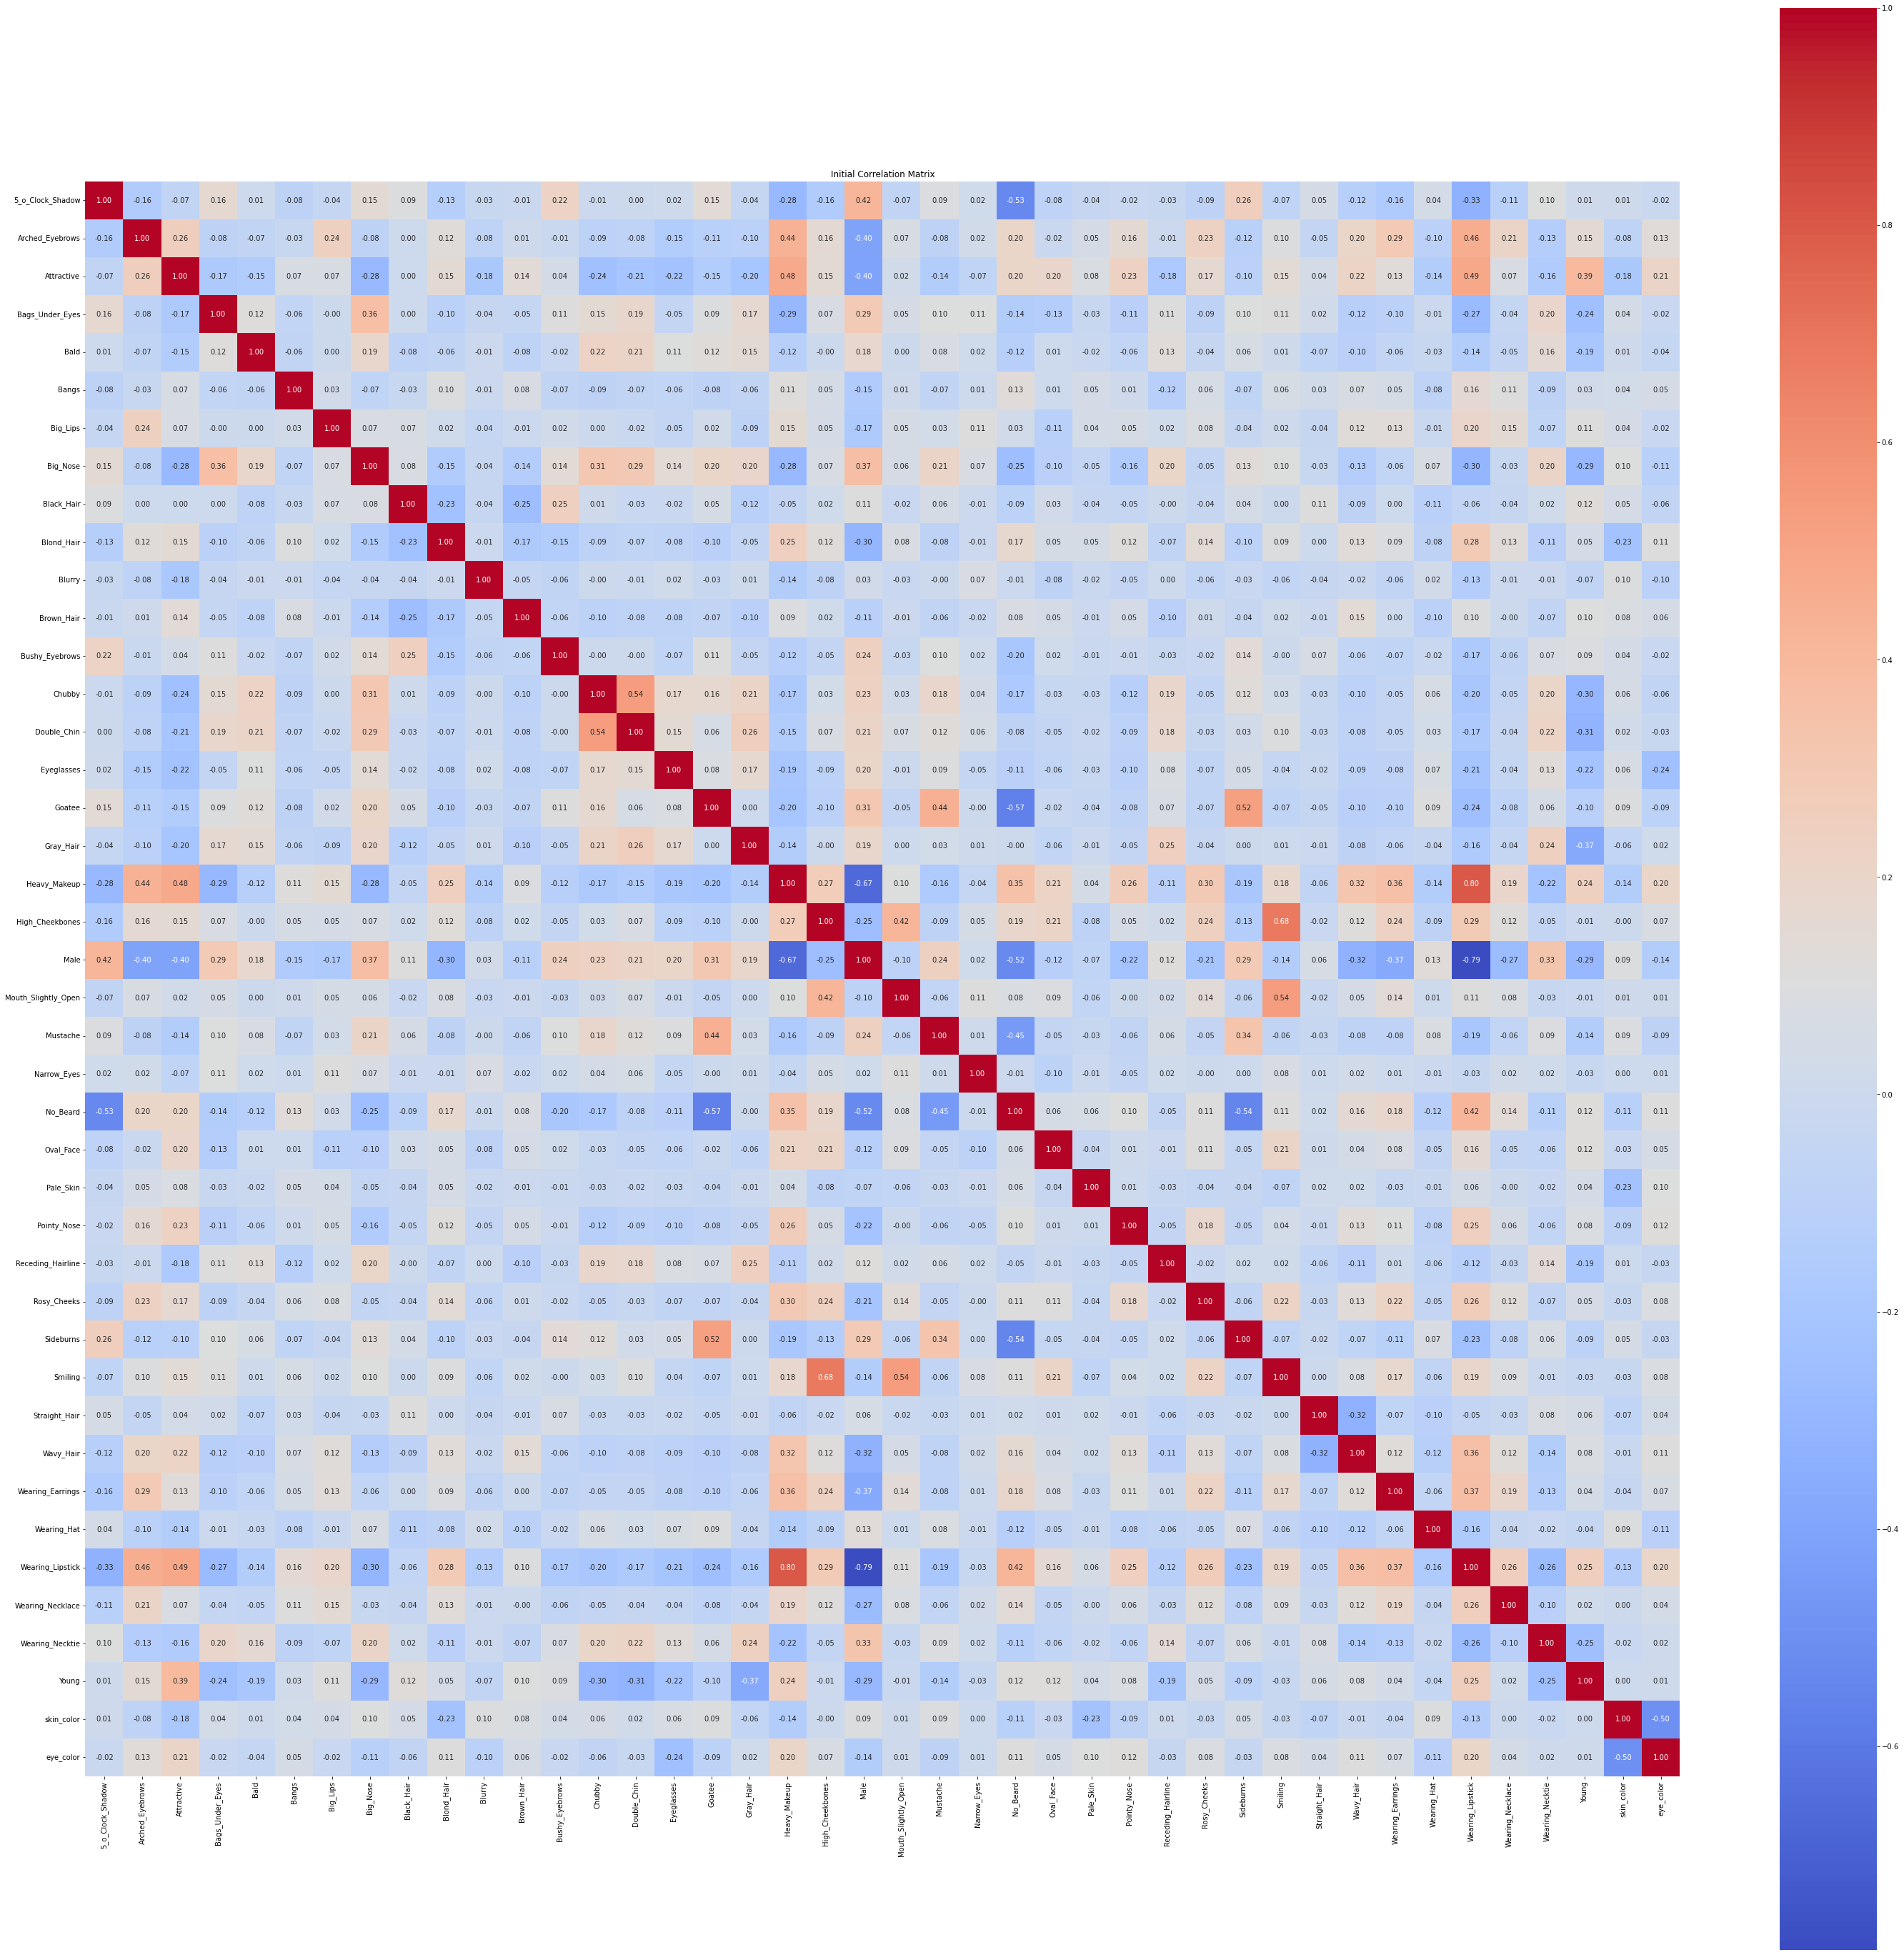

In [2]:
# Load DataFrame from the pickle file
corr_matrix = pd.read_pickle("corr_matrix.pkl")
# print(corr_matrix)
    
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Initial Correlation Matrix")
plt.show()
    

In [274]:
colname = corr_matrix.columns[0]
print(corr_matrix['Big_Lips'])

5_o_Clock_Shadow      -0.044157
Arched_Eyebrows        0.244953
Attractive             0.067925
Bags_Under_Eyes       -0.004603
Bald                   0.000379
Bangs                  0.028008
Big_Lips                    1.0
Big_Nose               0.072493
Black_Hair             0.066965
Blond_Hair             0.015688
Blurry                 -0.04155
Brown_Hair            -0.007585
Bushy_Eyebrows         0.023207
Chubby                 0.000741
Double_Chin           -0.016301
Eyeglasses             -0.05094
Goatee                 0.024771
Gray_Hair             -0.086643
Heavy_Makeup           0.148675
High_Cheekbones        0.045343
Male                  -0.168382
Mouth_Slightly_Open    0.052047
Mustache               0.034093
Narrow_Eyes            0.111921
No_Beard               0.026559
Oval_Face             -0.112359
Pale_Skin              0.039522
Pointy_Nose            0.052071
Receding_Hairline      0.018611
Rosy_Cheeks            0.083605
Sideburns             -0.037858
Smiling 

{'Narrow_Eyes'}
Features dropped: {'5_o_Clock_Shadow', 'Bald', 'Narrow_Eyes', 'Bangs', 'Big_Lips', 'Attractive'}
Features kept: set()
0
Filtered DataFrame:
                  5_o_Clock_Shadow Attractive      Bald     Bangs  Big_Lips  \
5_o_Clock_Shadow              1.0  -0.067736  0.007525 -0.082837 -0.044157   
Attractive              -0.067736        1.0 -0.146619  0.066655  0.067925   
Bald                     0.007525  -0.146619       1.0 -0.064657  0.000379   
Bangs                   -0.082837   0.066655 -0.064657       1.0  0.028008   
Big_Lips                -0.044157   0.067925  0.000379  0.028008       1.0   
Narrow_Eyes              0.017278  -0.069299  0.018614  0.005471  0.111921   

                 Narrow_Eyes  
5_o_Clock_Shadow    0.017278  
Attractive         -0.069299  
Bald                0.018614  
Bangs               0.005471  
Big_Lips            0.111921  
Narrow_Eyes              1.0  
6


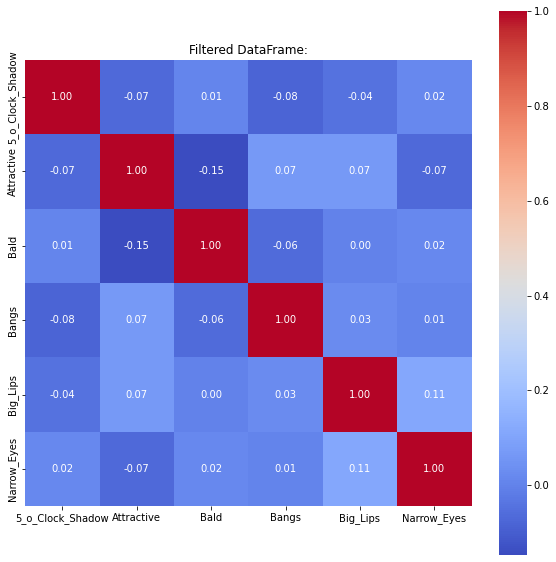

In [3]:

threshold = 0.15

# Get the features to drop
to_drop = set()
keep_list = set()
keep_num = []
num = 0
# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(42):
        
        if i != j:
            if abs(corr_matrix.iloc[i, j]) < threshold:
                num += 1
            else:
                break
        # if abs(corr_matrix.iloc[i, j]) > threshold:
        #     colname = corr_matrix.columns[i]
        #     to_drop.add(colname)
    if num == 41:
            colname = corr_matrix.columns[i]
            keep_list.add(colname)
            keep_num.append(i)
    num = 0
    if len(keep_list) > 0:
        break


print(keep_list)

# print(keep_num)
# keep_list = list(keep_list)
# print(corr_matrix[str(keep_list[0])].to_string(index=False))

z = 0
while len(keep_list) < 6:
    x = 0
    for j in keep_num:
        # print(j)
        if abs(corr_matrix.iloc[z, j]) < threshold:
          x += 1
    if x == len(keep_num):
        colname = corr_matrix.columns[z]
        keep_list.add(colname)
        keep_num.append(z)
    z += 1
    # if z == keep_num[len(keep_list) - 1] :
    #     z = keep_num.pop()
    #     z += 1
    #     keep_list.pop()
    if z == 42:
        z = 0
    

print("Features dropped:", keep_list)
# print(keep_num)


filtered_df = corr_matrix.drop(index=[ind for ind in corr_matrix.columns if ind not in keep_list], columns=[col for col in corr_matrix.columns if col not in keep_list])


print("Features kept:", to_drop)
print(len(to_drop))
print("Filtered DataFrame:\n", filtered_df)
print(len(filtered_df.columns))

plt.figure(figsize=(10, 10))
sns.heatmap(filtered_df.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Filtered DataFrame:')
plt.show()

In [59]:
columns_to_keep = filtered_df.columns.tolist()  
file_path = 'features.csv'  
file_test = 'test_features.csv'


data1 = pd.read_csv(file_path)
data2 = pd.read_csv(file_path)
data3 = pd.read_csv(file_test)



# Assuming data1 and data3 are already defined and columns_to_keep is a list of columns you want to keep
columns_to_keep2 = [col for col in columns_to_keep if col in data3.columns]

# Now drop the columns that are not in columns_to_keep
test_features = data3.drop(columns=[col for col in data1.columns if col not in columns_to_keep2], errors='ignore')



KM_feature1 = data1.drop(columns=[col for col in data1.columns if col not in columns_to_keep])
DBS_feature = KM_feature1
MS_feature = KM_feature1
KM_feature2 = data2.drop(columns=[col for col in data1.columns if col not in columns_to_keep and not col == 'skin_color' and not col == 'eye_color'])


KMc1 = KM_feature1
KMc2 = KM_feature2
# Print the resulting DataFrame
# print(DBS_feature)
# print(KM_feature2)
print(test_features)

    5_o_Clock_Shadow  Attractive  Bald  Bangs  Big_Lips  Narrow_Eyes
0                 -1           1    -1     -1        -1            1
1                 -1          -1    -1     -1        -1           -1
2                 -1          -1    -1     -1         1           -1
3                  1          -1    -1     -1         1           -1
4                 -1           1    -1     -1         1           -1
..               ...         ...   ...    ...       ...          ...
95                -1          -1    -1     -1        -1           -1
96                -1           1    -1     -1         1           -1
97                -1           1    -1     -1        -1           -1
98                -1           1    -1      1         1           -1
99                -1           1    -1     -1        -1           -1

[100 rows x 6 columns]


In [46]:
wcss = []  # List to hold WCSS values for each K


K_range = range(1, 20)  
features = KM_feature1.select_dtypes(include=[float, int])  # Select only numeric columns


scaler = StandardScaler()
scaled_features = KM_feature1
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(scaled_features)  
    wcss.append(kmeans.inertia_)  

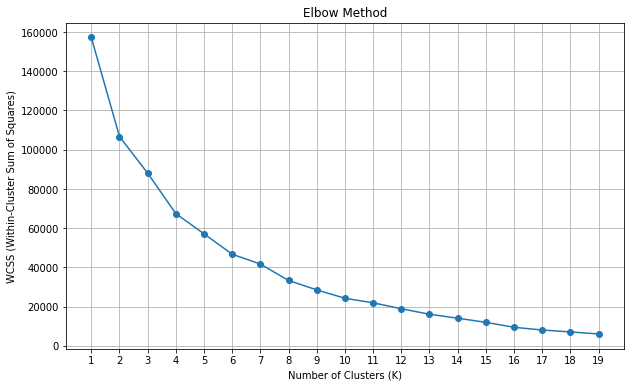

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid()
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


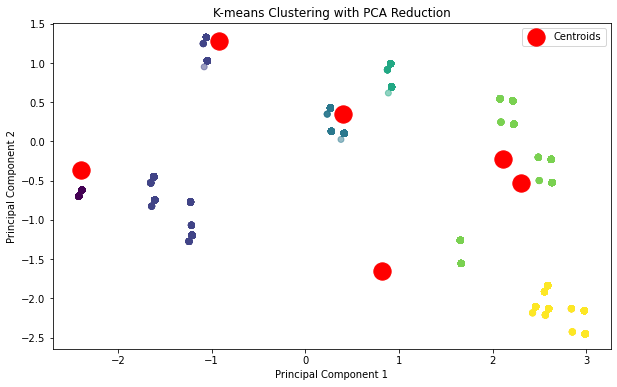

Silhouette Score: 0.7115623192726572


In [67]:

# print(KM_feature1.head())


features = KM_feature1.select_dtypes(include=[float, int])  # Select only numeric columns


scaler = StandardScaler()
scaled_features = KM_feature1


k = 6  # Set the number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=k, random_state=100)
kmeans.fit(scaled_features)

# Add cluster labels to the original DataFrame
KM_feature1['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(scaled_features, KM_feature1['Cluster'])



pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = KM_feature1['Cluster']
# Scale the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            s=300, c='red', label='Centroids')  # Plot scaled centroids
plt.title('K-means Clustering with PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
print(f'Silhouette Score: {silhouette_avg}')

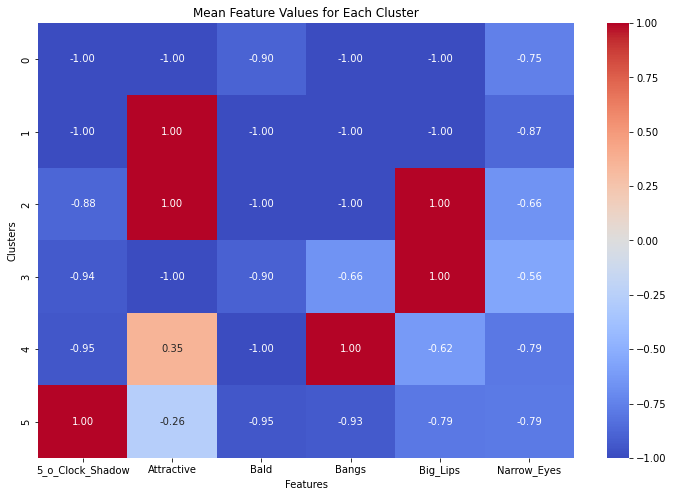

In [66]:
cluster_means = KM_feature1.groupby('Cluster').mean()

plt.figure(figsize=(12, 8))

sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Mean Feature Values for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')


plt.show()

In [53]:
import shutil
import os

df_clusters = KM_feature1 
df_images = pd.read_csv('features.csv')  



root_directory = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/dataset' 
base_folder = 'KMeans1/'  


os.makedirs(base_folder, exist_ok=True)


clusters = df_clusters['Cluster'].unique()
print(clusters)

for cluster in clusters:
    cluster_folder = os.path.join(base_folder, f'cluster_{cluster}')
    os.makedirs(cluster_folder, exist_ok=True)
    

    images_for_cluster = df_images[df_clusters['Cluster'] == cluster]['image_id'].values[:10]  
    
    for image in images_for_cluster:
        source_image_path = os.path.join(root_directory, image)
        destination_image_path = os.path.join(cluster_folder, image)
        

        if os.path.exists(source_image_path):
            shutil.copy(source_image_path, destination_image_path)

print("Folders created and images copied successfully.")

[4 0 5 2 1 3]
Folders created and images copied successfully.


In [38]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans


data = KM_feature1  


features = data.iloc[:, :-1]  
clusters = data.iloc[:, -1]   

kmeans = KMeans(n_clusters=clusters.nunique(), random_state=100)
kmeans.fit(features)


centers = kmeans.cluster_centers_


knn_50 = NearestNeighbors(n_neighbors=51) 
knn_50.fit(features)

nearest_50_indices = []
for center in centers:
    distances, indices = knn_50.kneighbors([center])
    nearest_50_indices.append(indices[0][1:])  


for i, indices in enumerate(nearest_50_indices):
    cluster_membership = clusters.iloc[indices].value_counts()
    print(f"Cluster {i}: Nearest 50 points belong to clusters:\n{cluster_membership}\n")

# Step 6: Repeat for 3000 nearest points
knn_3000 = NearestNeighbors(n_neighbors=3001)  # 3001 to exclude the center
knn_3000.fit(features)

nearest_3000_indices = []
for center in centers:
    distances, indices = knn_3000.kneighbors([center])
    nearest_3000_indices.append(indices[0][1:]) 


for i, indices in enumerate(nearest_3000_indices):
    cluster_membership = clusters.iloc[indices].value_counts()
    print(f"Cluster {i}: Nearest 3000 points belong to clusters:\n{cluster_membership}\n")
    
    # Analyzing misclassified points
    misclassified_indices = [idx for idx in indices if clusters.iloc[idx] != i]
    if misclassified_indices:
        misclassified_clusters = clusters.iloc[misclassified_indices].value_counts()
        print(f"Cluster {i}: Misclassified points belong to clusters:\n{misclassified_clusters}\n")


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Cluster 0: Nearest 50 points belong to clusters:
Cluster
0    50
Name: count, dtype: int64

Cluster 1: Nearest 50 points belong to clusters:
Cluster
1    50
Name: count, dtype: int64

Cluster 2: Nearest 50 points belong to clusters:
Cluster
2    50
Name: count, dtype: int64

Cluster 3: Nearest 50 points belong to clusters:
Cluster
3    50
Name: count, dtype: int64

Cluster 4: Nearest 50 points belong to clusters:
Cluster
4    50
Name: count, dtype: int64

Cluster 5: Nearest 50 points belong to clusters:
Cluster
5    50
Name: count, dtype: int64

Cluster 0: Nearest 3000 points belong to clusters:
Cluster
0    3000
Name: count, dtype: int64

Cluster 1: Nearest 3000 points belong to clusters:
Cluster
1    3000
Name: count, dtype: int64

Cluster 2: Nearest 3000 points belong to clusters:
Cluster
2    3000
Name: count, dtype: int64

Cluster 3: Nearest 3000 points belong to clusters:
Cluster
3    3000
Name: count, dtype: int64

Cluster 4: Nearest 3000 points belong to clusters:
Cluster
4    

In [ ]:
test_numeric_features = test_features.select_dtypes(include=[float, int])

test_features['Cluster'] = kmeans.predict(test_numeric_features)

print(test_features)

Test DataFrame columns: Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')
Data DataFrame columns: Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', '

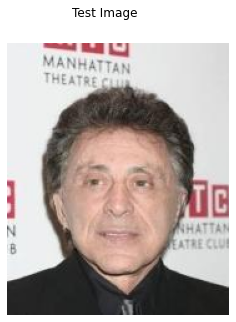

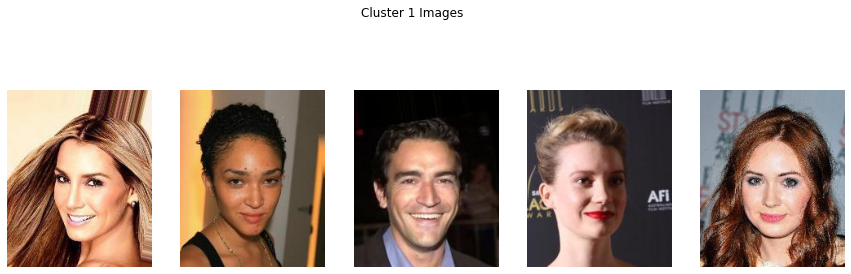

Test Image ID: 050098.jpg, Cluster: 1


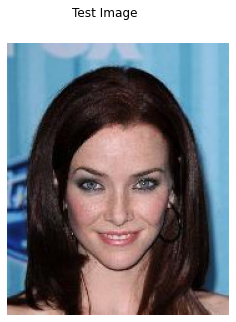

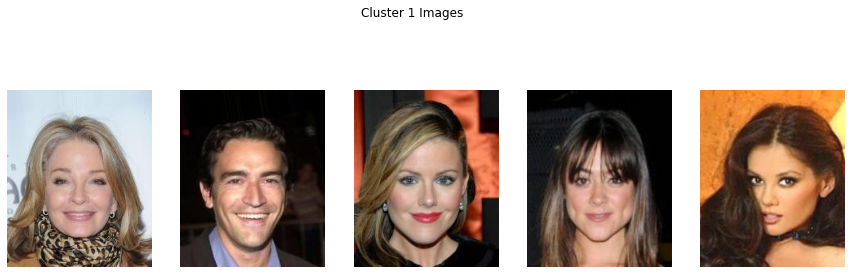

Test Image ID: 050086.jpg, Cluster: 4


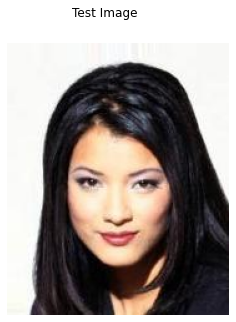

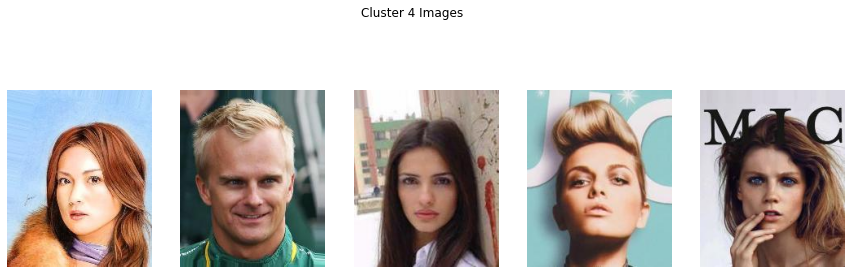

Test Image ID: 050055.jpg, Cluster: 0


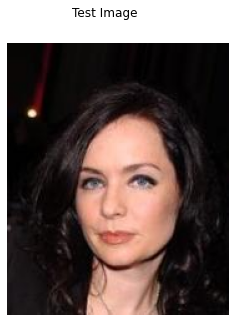

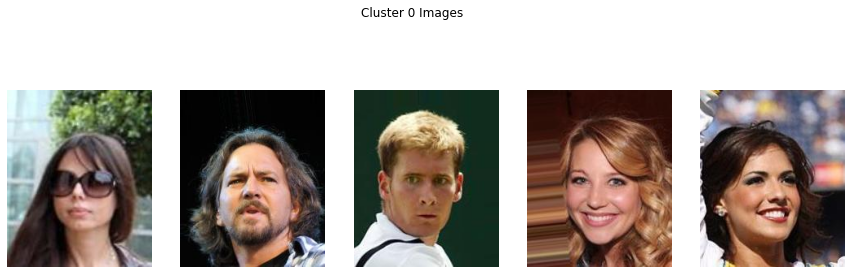

Test Image ID: 050025.jpg, Cluster: 5


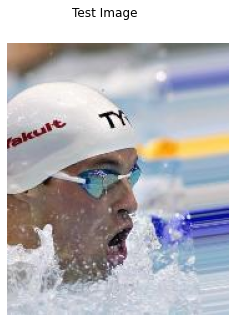

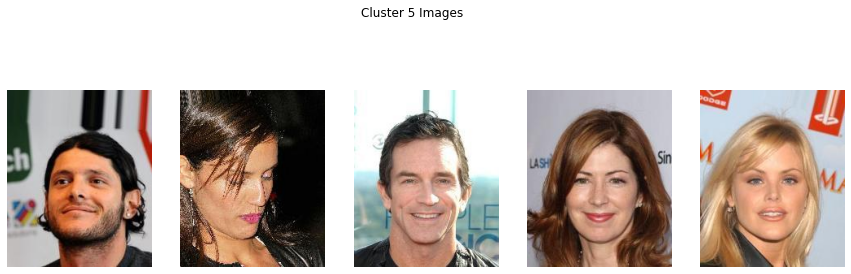

Test Image ID: 050032.jpg, Cluster: 0


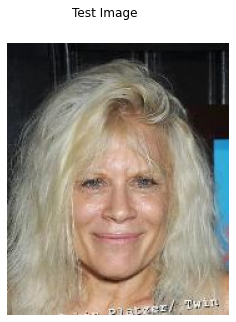

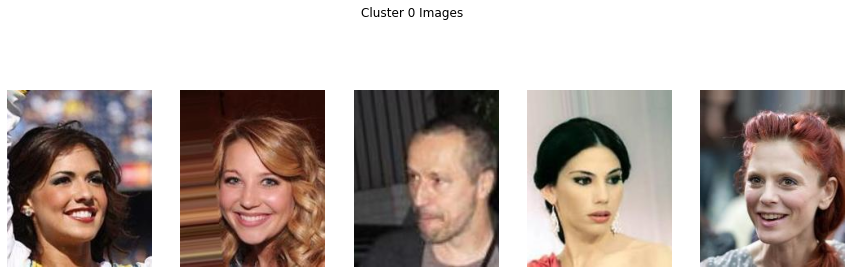

Test Image ID: 050057.jpg, Cluster: 1


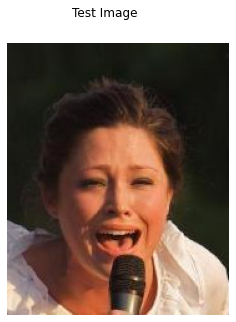

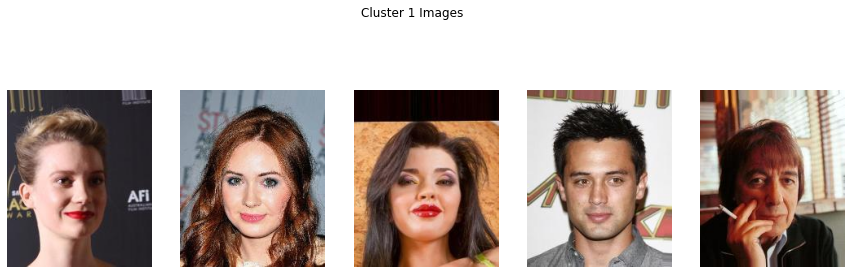

Test Image ID: 050078.jpg, Cluster: 3


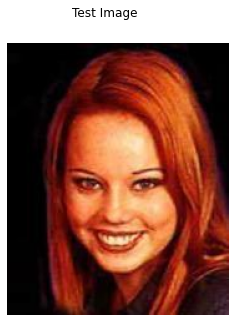

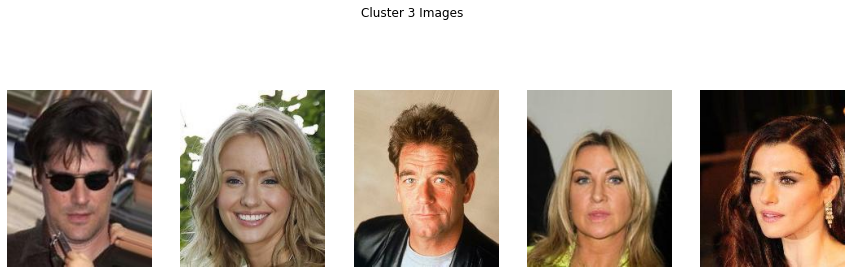

Test Image ID: 050065.jpg, Cluster: 0


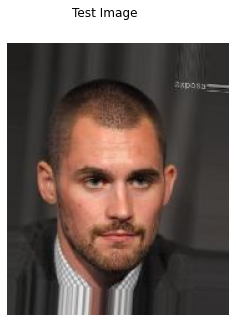

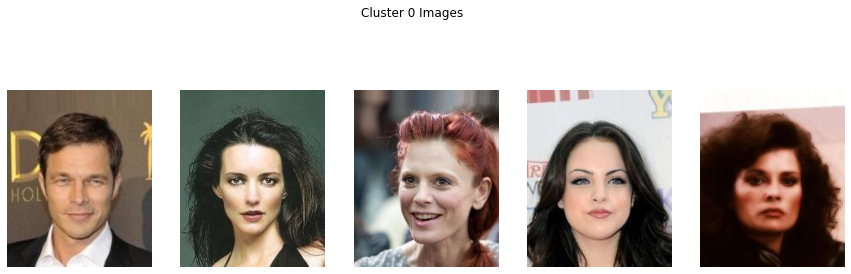

Test Image ID: 050008.jpg, Cluster: 5


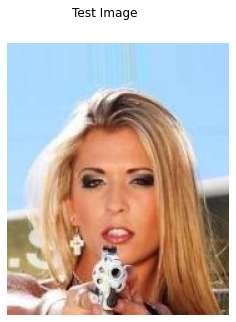

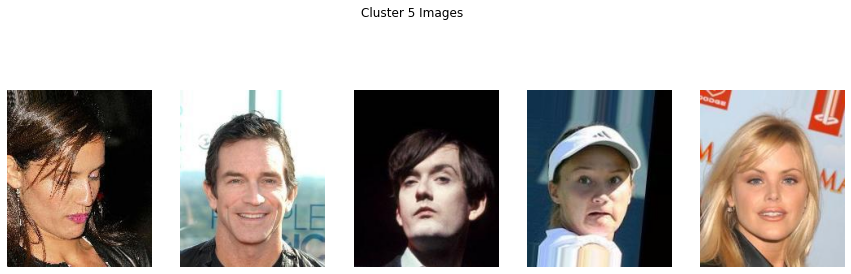

In [331]:
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


test_df = pd.read_csv('test_features.csv')  
data_df = pd.read_csv('features.csv')  


print("Test DataFrame columns:", test_df.columns)
print("Data DataFrame columns:", data_df.columns)

test_df['Cluster'] = KM_feature1['Cluster']
data_df['Cluster'] = test_features['Cluster']


# Randomly select 10 pictures from test_df
random_test_pictures = test_df.sample(n=10)


data_image_path = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/dataset'
test_image_path = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/test'


def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths):
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            plt.subplot(1, len(image_paths), i + 1)
            plt.imshow(img)
            plt.axis('off')
        else:
            print(f"Image not found: {image_path}")
    plt.suptitle(title)
    plt.show()

# Iterate through each randomly selected picture from test_df
for index, row in random_test_pictures.iterrows():
    test_image_id = row['image_id']
    cluster_number = row['Cluster']
    
    
    test_image_path_full = os.path.join(test_image_path, f"{test_image_id}").replace('\\' , '/')  
    print(f"Test Image ID: {test_image_id}, Cluster: {cluster_number}")
    
 
    display_images([test_image_path_full], "Test Image")

 
    matching_data_images = data_df[data_df['Cluster'] == cluster_number].sample(n=5)


    data_image_paths = [os.path.join(data_image_path, f"{img_id}").replace('\\' , '/') for img_id in matching_data_images['image_id']]
    

    display_images(data_image_paths, f"Cluster {cluster_number} Images")

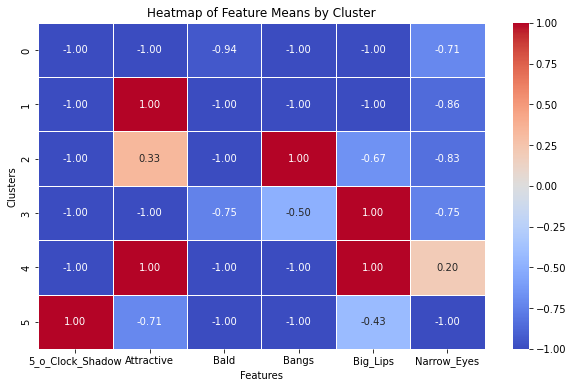

In [290]:


heatmap_data = test_features.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Means by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()


In [11]:
wcss = []  


K_range = range(1, 30)  # Testing from 1 to 10 clusters
features = KM_feature2.select_dtypes(include=[float, int]) 

# Standardize the features
scaler = StandardScaler()
scaled_features = KM_feature2
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=165)
    kmeans.fit(scaled_features) 
    wcss.append(kmeans.inertia_) 

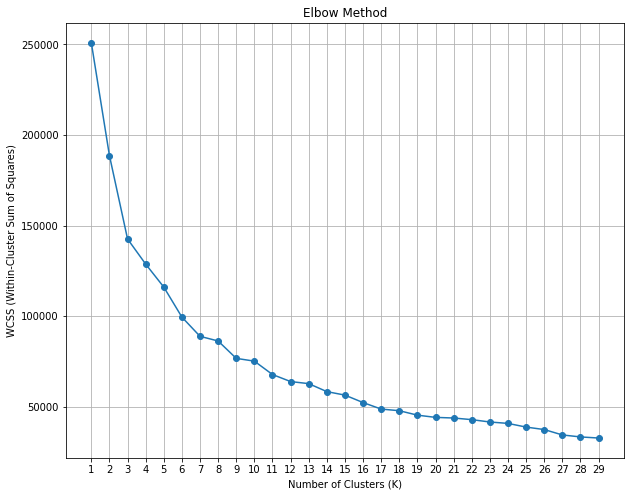

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid()
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


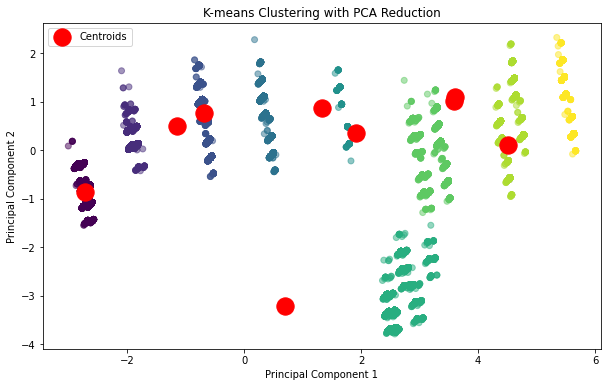

Silhouette Score: 0.4423807707041405


In [55]:

# print(KM_feature1.head())


features = KM_feature2.select_dtypes(include=[float, int]) 


scaler = StandardScaler()
scaled_features = KM_feature2


k = 9  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=100)
kmeans.fit(scaled_features)


KM_feature2['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(scaled_features, KM_feature2['Cluster'])



pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = KM_feature2['Cluster']
centroids_pca = pca.transform(kmeans.cluster_centers_)


plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            s=300, c='red', label='Centroids') 
plt.title('K-means Clustering with PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
print(f'Silhouette Score: {silhouette_avg}')

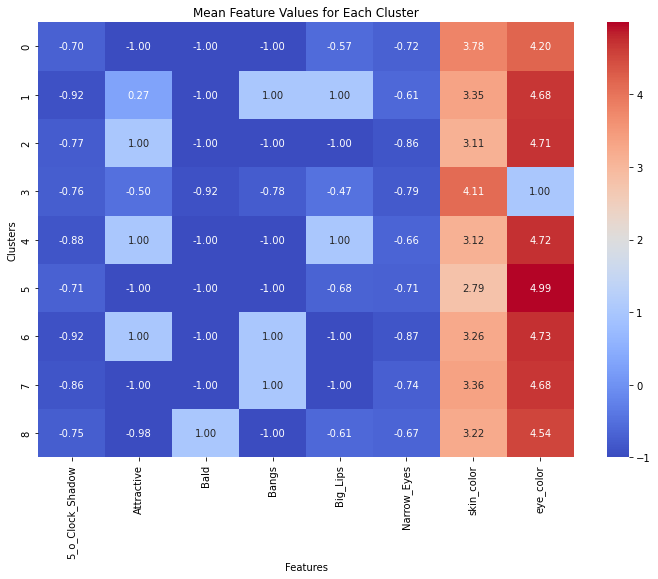

In [40]:
cluster_means = KM_feature2.groupby('Cluster').mean()

plt.figure(figsize=(12, 8))


sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mean Feature Values for Each Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')


plt.show()

In [41]:
df_clusters = KM_feature2 
df_images = pd.read_csv('features.csv') 


root_directory = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/dataset'  
base_folder = 'KMeans2/'  

os.makedirs(base_folder, exist_ok=True)


clusters = df_clusters['Cluster'].unique()
print(clusters)

for cluster in clusters:
    cluster_folder = os.path.join(base_folder, f'cluster_{cluster}')
    os.makedirs(cluster_folder, exist_ok=True)
    
   
    images_for_cluster = df_images[df_clusters['Cluster'] == cluster]['image_id'].values[:10] 
    
    for image in images_for_cluster:
        source_image_path = os.path.join(root_directory, image)
        destination_image_path = os.path.join(cluster_folder, image)
        
        
        if os.path.exists(source_image_path):
            shutil.copy(source_image_path, destination_image_path)

print("Folders created and images copied successfully.")

[2 5 0 4 1 6 3 8 7]
Folders created and images copied successfully.


In [42]:


data = KM_feature2  


features = data.iloc[:, :-1] 
clusters = data.iloc[:, -1]   


kmeans = KMeans(n_clusters=clusters.nunique(), random_state=100)
kmeans.fit(features)


centers = kmeans.cluster_centers_


knn_50 = NearestNeighbors(n_neighbors=51)  
knn_50.fit(features)

nearest_50_indices = []
for center in centers:
    distances, indices = knn_50.kneighbors([center])
    nearest_50_indices.append(indices[0][1:]) 


for i, indices in enumerate(nearest_50_indices):
    cluster_membership = clusters.iloc[indices].value_counts()
    print(f"Cluster {i}: Nearest 50 points belong to clusters:\n{cluster_membership}\n")


knn_3000 = NearestNeighbors(n_neighbors=3001)  # 3001 to exclude the center
knn_3000.fit(features)

nearest_3000_indices = []
for center in centers:
    distances, indices = knn_3000.kneighbors([center])
    nearest_3000_indices.append(indices[0][1:])  


for i, indices in enumerate(nearest_3000_indices):
    cluster_membership = clusters.iloc[indices].value_counts()
    print(f"Cluster {i}: Nearest 3000 points belong to clusters:\n{cluster_membership}\n")
    

    misclassified_indices = [idx for idx in indices if clusters.iloc[idx] != i]
    if misclassified_indices:
        misclassified_clusters = clusters.iloc[misclassified_indices].value_counts()
        print(f"Cluster {i}: Misclassified points belong to clusters:\n{misclassified_clusters}\n")


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Cluster 0: Nearest 50 points belong to clusters:
Cluster
0    50
Name: count, dtype: int64

Cluster 1: Nearest 50 points belong to clusters:
Cluster
1    50
Name: count, dtype: int64

Cluster 2: Nearest 50 points belong to clusters:
Cluster
2    50
Name: count, dtype: int64

Cluster 3: Nearest 50 points belong to clusters:
Cluster
3    50
Name: count, dtype: int64

Cluster 4: Nearest 50 points belong to clusters:
Cluster
4    50
Name: count, dtype: int64

Cluster 5: Nearest 50 points belong to clusters:
Cluster
5    50
Name: count, dtype: int64

Cluster 6: Nearest 50 points belong to clusters:
Cluster
6    50
Name: count, dtype: int64

Cluster 7: Nearest 50 points belong to clusters:
Cluster
7    50
Name: count, dtype: int64

Cluster 8: Nearest 50 points belong to clusters:
Cluster
8    50
Name: count, dtype: int64

Cluster 0: Nearest 3000 points belong to clusters:
Cluster
0    3000
Name: count, dtype: int64

Cluster 1: Nearest 3000 points belong to clusters:
Cluster
1    1766
6    12

Best eps: 0.1, Best min_samples: 2


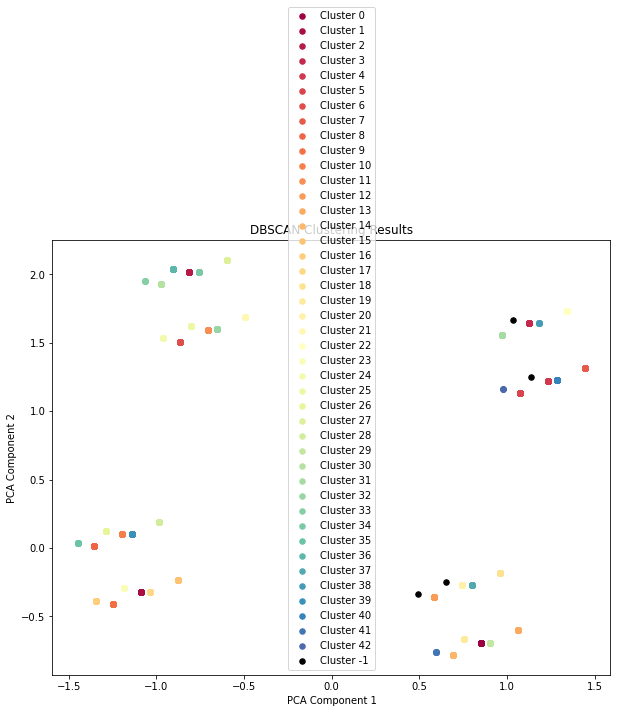

0.9999040889008454


In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

df = DBS_feature

if df.shape[1] != 6:
    raise ValueError("The dataset must contain exactly 6 features.")


scaler = StandardScaler()
X_scaled = df


best_eps = 0.1
best_min_samples = 2
best_score = -1

# Uncomment this section to find best parameters (if needed)
# for eps in np.arange(0.1, 1.0, 0.1):
#     for min_samples in range(2, 10):
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(X_scaled)
#         n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#         if n_clusters > 1:
#             s_score = silhouette_score(X_scaled, labels)
#             if best_score < s_score:
#                 best_score = s_score
#                 best_eps = eps
#                 best_min_samples = min_samples

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}')


dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X_scaled)
s_score = silhouette_score(X_scaled, labels)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(i / len(unique_labels)) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1], s=30, color=col, label=f'Cluster {k}')

plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
print(s_score)



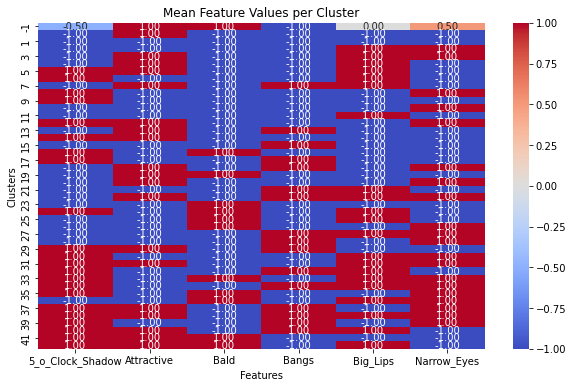

In [193]:

df['Cluster'] = labels
mean_values = df.groupby('Cluster').mean()


plt.figure(figsize=(10, 6))
sns.heatmap(mean_values, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Feature Values per Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

In [194]:
df_clusters = df 
df_images = pd.read_csv('features.csv') 




root_directory = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/dataset'  
base_folder = 'DBscan/'  


os.makedirs(base_folder, exist_ok=True)


clusters = df_clusters['Cluster'].unique()
print(clusters)

for cluster in clusters:
    cluster_folder = os.path.join(base_folder, f'cluster_{cluster}')
    os.makedirs(cluster_folder, exist_ok=True)
    
    images_for_cluster = df_images[df_clusters['Cluster'] == cluster]['image_id'].values[:10] 
    
    for image in images_for_cluster:
        source_image_path = os.path.join(root_directory, image)
        destination_image_path = os.path.join(cluster_folder, image)
        

        if os.path.exists(source_image_path):
            shutil.copy(source_image_path, destination_image_path)

print("Folders created and images copied successfully.")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 -1 42]
Folders created and images copied successfully.


In [195]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [280]:
df = MS_feature


In [208]:

bandwidth = estimate_bandwidth(df, quantile=0.25, n_samples=2500)  
print(bandwidth)


1.5981681162842998


In [ ]:
for b in np.arange(1.5, 2.2, 0.05):
    mean_shift = MeanShift(bandwidth=b)
    mean_shift.fit(df)

    # Get cluster labels
    labels = mean_shift.labels_
    n_clusters = len(np.unique(labels))
    print(f'Number of clusters found: {n_clusters}')
    silhouette_avg = silhouette_score(df, labels)
    print("Silhouette Score:", silhouette_avg)

In [210]:
mean_shift = MeanShift(bandwidth=1.5981681162842998)
mean_shift.fit(df)


labels = mean_shift.labels_
n_clusters = len(np.unique(labels))
print(f'Number of clusters found: {n_clusters}')
silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg)

Number of clusters found: 47
Silhouette Score: 0.99992


In [211]:

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

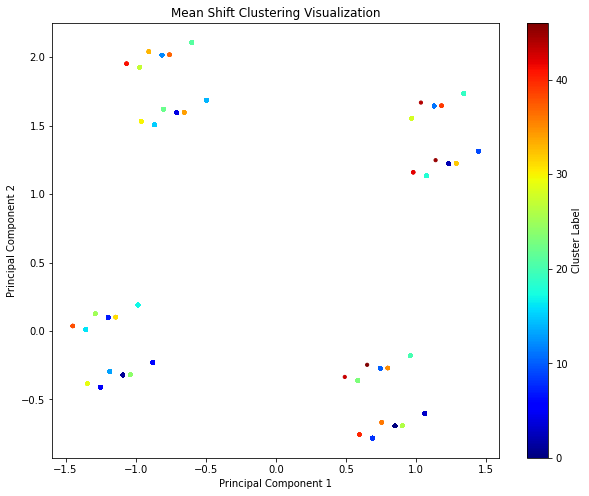

In [212]:
plt.figure(figsize=(10, 8))

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='jet', s=10)  


plt.title('Mean Shift Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.colorbar(label='Cluster Label')


plt.show()



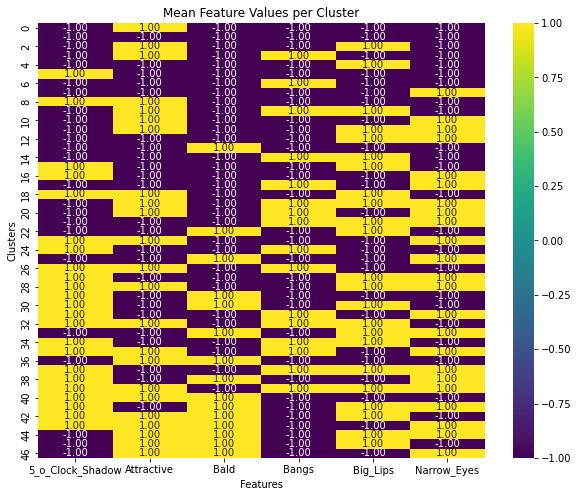

In [213]:

labels = mean_shift.labels_

df['Cluster'] = labels


cluster_means = df.groupby('Cluster').mean()


plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mean Feature Values per Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

In [214]:
df_clusters = df  
df_images = pd.read_csv('features.csv') 




root_directory = 'C:/Users/ASUS/Desktop/Mohasebati project/BS/dataset' 
base_folder = 'MeanShift/'  


os.makedirs(base_folder, exist_ok=True)


clusters = df_clusters['Cluster'].unique()
print(clusters)

for cluster in clusters:
    cluster_folder = os.path.join(base_folder, f'cluster_{cluster}')
    os.makedirs(cluster_folder, exist_ok=True)
    
    
    images_for_cluster = df_images[df_clusters['Cluster'] == cluster]['image_id'].values[:10]  
    
    for image in images_for_cluster:
        source_image_path = os.path.join(root_directory, image)
        destination_image_path = os.path.join(cluster_folder, image)
        
        
        if os.path.exists(source_image_path):
            shutil.copy(source_image_path, destination_image_path)

print("Folders created and images copied successfully.")

[ 0  1 12 11  2 18 15  9 16  5  7  4 23  3  8  6 29 24 20 36 10 14 19 13
 30 22 25 21 17 26 27 28 34 41 37 38 33 35 39 31 32 40 45 42 43 44 46]
Folders created and images copied successfully.
